In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
from sklearn import metrics
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

    GPA  GMAT  De
0  2.60   394   0
1  2.55   528   0
2  2.72   399   0
3  2.85   381   0
4  2.90   384   0
5  2.86   494   1
6  2.85   496   1
7  3.14   419   1
8  3.28   371   1
9  2.89   447   1
1
[0.0]
[0.0]
2
[0.0, 0.4]
[0.0, 0.2727272727272727]
3
[0.0, 0.4, 0.5]
[0.0, 0.2727272727272727, 0.25]
4
[0.0, 0.4, 0.5, 0.30000000000000004]
[0.0, 0.2727272727272727, 0.25, 0.2954545454545454]
5
[0.0, 0.4, 0.5, 0.30000000000000004, 0.19999999999999996]
[0.0, 0.2727272727272727, 0.25, 0.2954545454545454, 0.25]
6
[0.0, 0.4, 0.5, 0.30000000000000004, 0.19999999999999996, 0.4]
[0.0, 0.2727272727272727, 0.25, 0.2954545454545454, 0.25, 0.31818181818181823]
7
[0.0, 0.4, 0.5, 0.30000000000000004, 0.19999999999999996, 0.4, 0.30000000000000004]
[0.0, 0.2727272727272727, 0.25, 0.2954545454545454, 0.25, 0.31818181818181823, 0.31818181818181823]
8
[0.0, 0.4, 0.5, 0.30000000000000004, 0.19999999999999996, 0.4, 0.30000000000000004, 0.4]
[0.0, 0.2727272727272727, 0.25, 0.2954545454545454, 0.25, 0.318181818

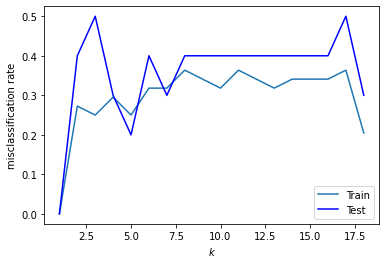

In [12]:
data_train = pd.read_csv("admission_train.csv")
data_test = pd.read_csv("admission_test.csv")
data_train.De = data_train.De.replace('border',1)
data_train.De = data_train.De.replace('notadmit',0)
data_test.De = data_test.De.replace('border',1)
data_test.De = data_test.De.replace('notadmit',0)
print(data_test)

train_mcr = []
test_mcr = []
kmax = 18
for k in range(1, kmax+1):
    print(k)
    neigh = KNeighborsClassifier(n_neighbors= k,metric = 'euclidean')
    neigh.fit(data_train,data_train.De)
    tr_pred = neigh.predict(data_train)
    test_pred = neigh.predict(data_test)
    train_mcr.append(zero_one_loss(data_train.De, tr_pred))
    test_mcr.append(zero_one_loss(data_test.De, test_pred))
    print(test_mcr)
    print(train_mcr)
xi = np.linspace(1, 18, 18)

plt.figure()
plt.plot(xi,train_mcr,xi,test_mcr, 'b')
plt.legend(['Train','Test'])
plt.xlabel('$k$')
plt.ylabel('misclassification rate')
plt.show()

In [13]:
k = 5
test_auc = []

# one iteration
neigh = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
neigh.fit(data_train, data_train.De)
test_pred = neigh.predict(data_test)
fpr, tpr, thresholds = metrics.roc_curve(np.array(data_test.De), np.array(test_pred), pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
print(test_pred)

[0 0 0 0 0 1 1 1 1 1]


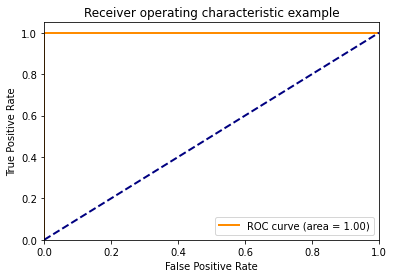

[[5 0]
 [0 5]]


In [14]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(data_test.De, test_pred)
print(cm)

In [15]:
y_train_pred = neigh.predict(data_train)
print(y_train_pred)
cm2 = confusion_matrix(data_train.De, y_train_pred)
print(cm2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]
[[23  0]
 [ 0 21]]
